In [25]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("Mall_Customers.csv")

In [27]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
data.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


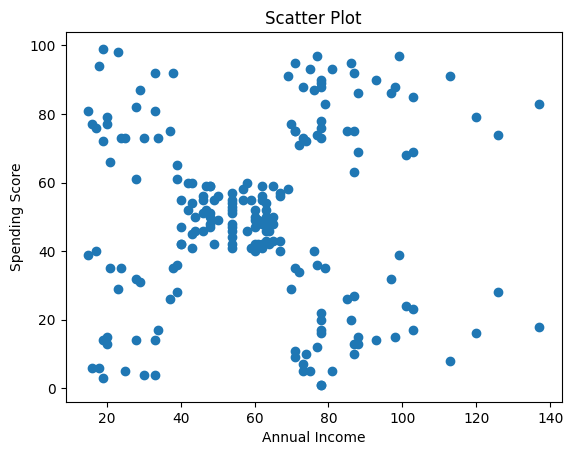

In [30]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.title('Scatter Plot')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [31]:
X = data.iloc[:,[3,4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(2, random_state=10)

In [34]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=10)

In [35]:
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [36]:
kmeans.cluster_centers_

array([[70.64150943, 17.30188679],
       [56.92517007, 62.06122449]])

In [37]:
data_new = data.copy()
data_new['Clusters'] = kmeans.labels_
data_new

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


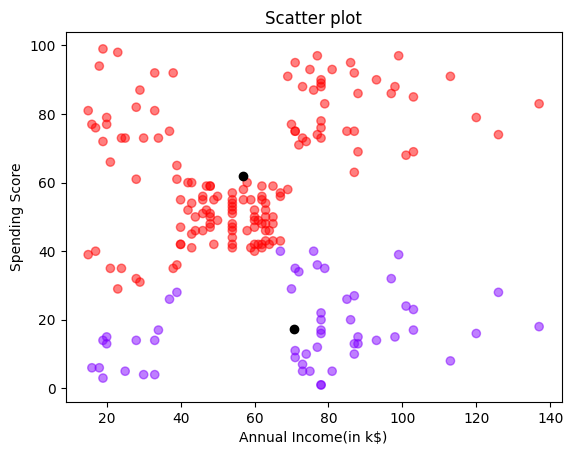

In [38]:
plt.scatter(data_new['Annual Income (k$)'], data_new['Spending Score (1-100)'], c=data_new['Clusters'], cmap='rainbow', alpha=0.5)

plt.plot(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], c='k', marker='o')
plt.plot(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], c='k', marker='o')


plt.title('Scatter plot')
plt.xlabel('Annual Income(in k$)')
plt.ylabel('Spending Score')
plt.show()

In [39]:
kmeans.inertia_

184609.98434090617

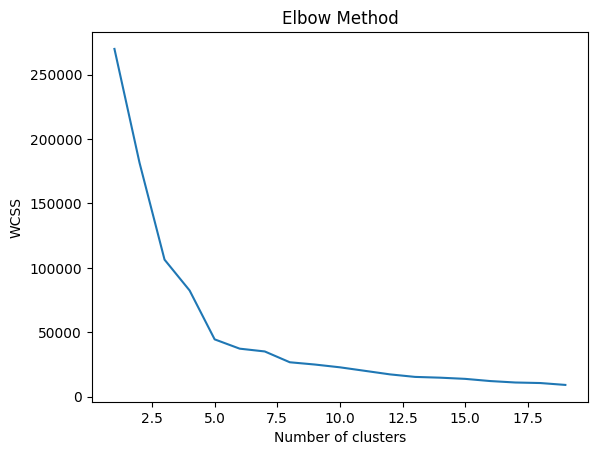

In [40]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(5, random_state=11)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=11)

In [42]:
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [43]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [44]:
data_new = data.copy()
data_new['Clusters'] = kmeans.labels_
data_new.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
5,6,Female,22,17,76,4
6,7,Female,35,18,6,0
7,8,Female,23,18,94,4
8,9,Male,64,19,3,0
9,10,Female,30,19,72,4


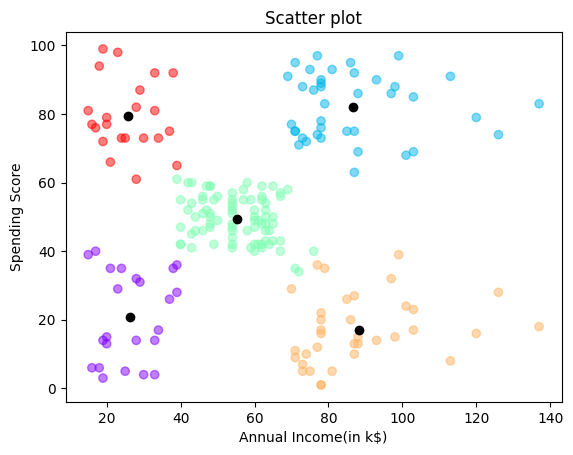

In [45]:
plt.scatter(data_new['Annual Income (k$)'], data_new['Spending Score (1-100)'], c=data_new['Clusters'], cmap='rainbow', alpha=0.5)

plt.plot(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], c='k', marker='o')
plt.plot(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], c='k', marker='o')
plt.plot(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1], c='k', marker='o')
plt.plot(kmeans.cluster_centers_[3,0], kmeans.cluster_centers_[3,1], c='k', marker='o')
plt.plot(kmeans.cluster_centers_[4,0], kmeans.cluster_centers_[4,1], c='k', marker='o')


plt.title('Scatter plot')
plt.xlabel('Annual Income(in k$)')
plt.ylabel('Spending Score')
plt.show()

In [46]:
data_new.groupby('Clusters').mean(numeric_only = True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
0,23.000000,45.217391,26.304348,20.913043
1,162.000000,32.692308,86.538462,82.128205
2,86.320988,42.716049,55.296296,49.518519
3,164.371429,41.114286,88.200000,17.114286
4,23.090909,25.272727,25.727273,79.363636


In [47]:
X = data.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
